In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

In [134]:
data = pd.read_csv("aug_test.csv")

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [136]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [137]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2129


In [138]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка gender. Тип данных object. Количество пустых значений 508, 23.86%.
Колонка enrolled_university. Тип данных object. Количество пустых значений 31, 1.46%.
Колонка education_level. Тип данных object. Количество пустых значений 52, 2.44%.
Колонка major_discipline. Тип данных object. Количество пустых значений 312, 14.65%.
Колонка experience. Тип данных object. Количество пустых значений 5, 0.23%.
Колонка company_size. Тип данных object. Количество пустых значений 622, 29.22%.
Колонка company_type. Тип данных object. Количество пустых значений 634, 29.78%.
Колонка last_new_job. Тип данных object. Количество пустых значений 40, 1.88%.


In [139]:
cat_temp_data = data[['education_level']]
cat_temp_data.head()

,education_level
0,Graduate
1,Graduate
2,High School
3,Masters
4,Graduate


In [140]:
cat_temp_data['education_level'].unique()

array(['Graduate', 'High School', 'Masters', nan, 'Phd', 'Primary School'],
      dtype=object)

In [141]:
cat_temp_data[cat_temp_data['education_level'].isnull()].shape[0]

52

In [142]:
cat_temp_data.value_counts()

education_level
Graduate           1269
Masters             496
High School         222
Phd                  54
Primary School       36
dtype: int64

In [143]:
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp1 = imp1.fit_transform(cat_temp_data)
unique, counts = np.unique(data_imp1, return_counts=True)

np.asarray((unique, counts)).T

array([['Graduate', 1321],
       ['High School', 222],
       ['Masters', 496],
       ['Phd', 54],
       ['Primary School', 36]], dtype=object)

In [144]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp2 = imp2.fit_transform(cat_temp_data)
unique, counts = np.unique(data_imp2, return_counts=True)

np.asarray((unique, counts)).T

array([['Graduate', 1269],
       ['High School', 222],
       ['Masters', 496],
       ['NA', 52],
       ['Phd', 54],
       ['Primary School', 36]], dtype=object)

In [145]:
cat_enc = pd.DataFrame({'c1':data_imp1.T[0]})
cat_enc

,c1
0,Graduate
1,Graduate
2,High School
3,Masters
4,Graduate
...,...
2124,Graduate
2125,Masters
2126,Primary School
2127,High School


In [146]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc['c1'].unique()

array(['Graduate', 'High School', 'Masters', 'Phd', 'Primary School'],
      dtype=object)

In [147]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4])

In [148]:
le.inverse_transform([0, 1, 2, 3, 4])

array(['Graduate', 'High School', 'Masters', 'Phd', 'Primary School'],
      dtype=object)

In [149]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(2129, 1)

In [150]:
cat_enc_ohe.shape

(2129, 5)

In [151]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]])

In [152]:
cat_enc.head(10)

,c1
0,Graduate
1,Graduate
2,High School
3,Masters
4,Graduate
5,Masters
6,Graduate
7,Graduate
8,Graduate
9,Graduate


In [153]:
pd.get_dummies(cat_enc).head()

,c1_Graduate,c1_High School,c1_Masters,c1_Phd,c1_Primary School
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [154]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,education_level_nan
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


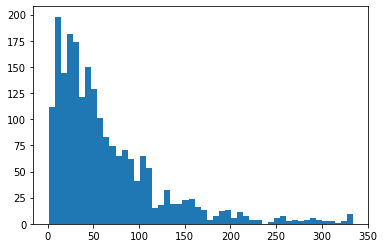

In [155]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['training_hours']])
plt.hist(data['training_hours'],50)
plt.show()

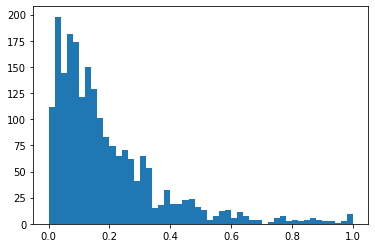

In [156]:
plt.hist(sc1_data, 50)
plt.show()

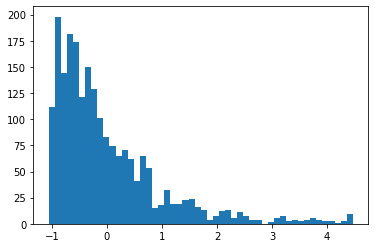

In [159]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['training_hours']])
plt.hist(sc2_data, 50)
plt.show()